# **QUESTION 2 — DIABETES DATA PROCESSING**

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **CLEANED CSV**

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from google.colab import files
    COLAB = True
except:
    from IPython.display import FileLink
    COLAB = False

base_dir = "/content/Q2_diabetes"
os.makedirs(base_dir, exist_ok=True)

data_path = "/content/diabetes.csv"
df = pd.read_csv(data_path)

df_clean = df.copy()

cols_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_replace:
    df_clean[col] = df_clean[col].replace(0, np.nan)
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

clean_csv_path = os.path.join(base_dir, "diabetes_clean.csv")
df_clean.to_csv(clean_csv_path, index=False)

if COLAB:
    files.download(clean_csv_path)
else:
    FileLink(clean_csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **LOAD DIABETES DATA**

In [7]:


diabetes = pd.read_csv("/content/diabetes.csv")
diabetes.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **(a) SAMPLE 25 & COMPARE MEAN & MAX GLUCOSE**

Population Mean: 120.89453125
Sample Mean: 118.08
Population Max: 199
Sample Max: 197


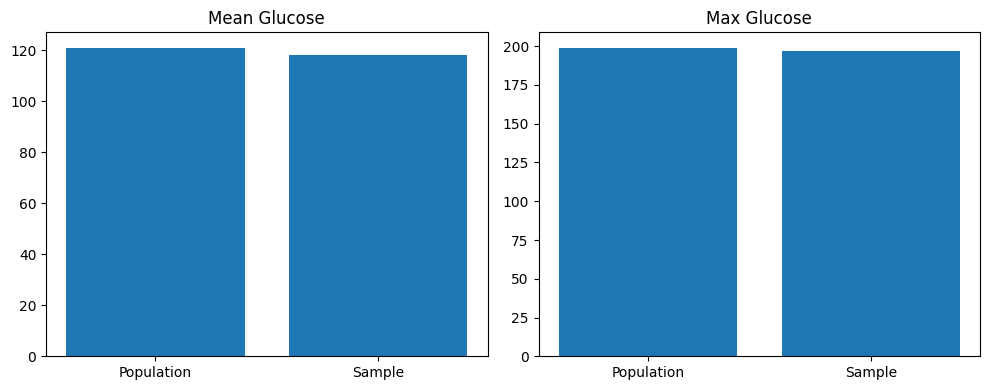

In [8]:
np.random.seed(16386780)
sample_25 = diabetes.sample(25, replace=False)

pop_mean = diabetes["Glucose"].mean()
sample_mean = sample_25["Glucose"].mean()

pop_max = diabetes["Glucose"].max()
sample_max = sample_25["Glucose"].max()

print("Population Mean:", pop_mean)
print("Sample Mean:", sample_mean)
print("Population Max:", pop_max)
print("Sample Max:", sample_max)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(["Population","Sample"], [pop_mean, sample_mean])
plt.title("Mean Glucose")

plt.subplot(1,2,2)
plt.bar(["Population","Sample"], [pop_max, sample_max])
plt.title("Max Glucose")

plt.tight_layout()
plt.show()


# **(b) 98th PERCENTILE OF BMI**

Population 98th Percentile: 47.52599999999996
Sample 98th Percentile: 57.06799999999999


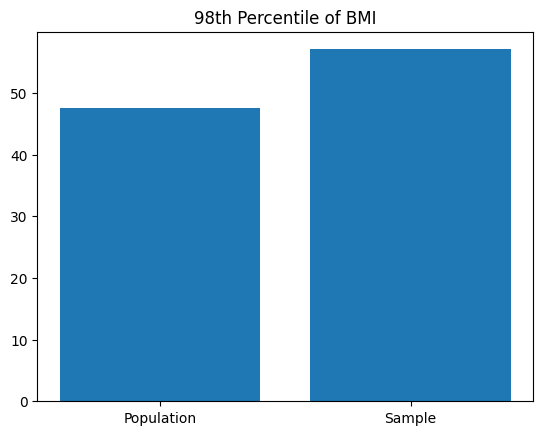

In [9]:
pop_p98 = diabetes["BMI"].quantile(0.98)
sample_p98 = sample_25["BMI"].quantile(0.98)

print("Population 98th Percentile:", pop_p98)
print("Sample 98th Percentile:", sample_p98)

plt.bar(["Population","Sample"], [pop_p98, sample_p98])
plt.title("98th Percentile of BMI")
plt.show()


# **(c) BOOTSTRAP (500×150) FOR BLOOD PRESSURE**

Population Mean: 69.10546875
Bootstrap Mean: 69.29881333333334
Population SD: 19.355807170644777
Bootstrap SD: 19.01990934711163
Population 98th: 99.31999999999994
Bootstrap 98th: 98.36660000000002


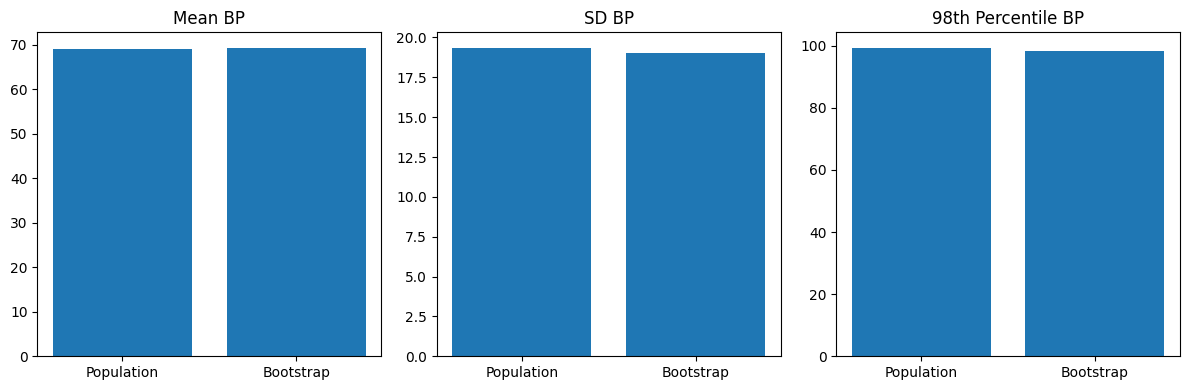

In [10]:
bp = diabetes["BloodPressure"].dropna()

boot_means = []
boot_stds = []
boot_p98 = []

np.random.seed(111)

for _ in range(500):
    s = bp.sample(150, replace=True)
    boot_means.append(s.mean())
    boot_stds.append(s.std(ddof=1))
    boot_p98.append(s.quantile(0.98))

boot_mean_avg = np.mean(boot_means)
boot_std_avg = np.mean(boot_stds)
boot_p98_avg = np.mean(boot_p98)

pop_mean_bp = bp.mean()
pop_std_bp = bp.std(ddof=1)
pop_p98_bp = bp.quantile(0.98)

print("Population Mean:", pop_mean_bp)
print("Bootstrap Mean:", boot_mean_avg)
print("Population SD:", pop_std_bp)
print("Bootstrap SD:", boot_std_avg)
print("Population 98th:", pop_p98_bp)
print("Bootstrap 98th:", boot_p98_avg)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.bar(["Population","Bootstrap"], [pop_mean_bp, boot_mean_avg])
plt.title("Mean BP")

plt.subplot(1,3,2)
plt.bar(["Population","Bootstrap"], [pop_std_bp, boot_std_avg])
plt.title("SD BP")

plt.subplot(1,3,3)
plt.bar(["Population","Bootstrap"], [pop_p98_bp, boot_p98_avg])
plt.title("98th Percentile BP")

plt.tight_layout()
plt.show()
